In [166]:
#Header
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [167]:
#PreSet

plt.rc('font', family='Malgun Gothic')  # 폰트 설정
plt.rc('axes', unicode_minus=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [168]:
#File Read
electric1 = pd.read_csv("data//연료종류별 자동차 등록현황.csv")
electric2 = pd.read_csv("data//한국가스안전공사_수소충전소 현황_20210914.csv", encoding='CP949')
electric3 = pd.read_csv("data//한국전력공사_지역별 전기차 충전기 현황정보_20201008.csv", encoding='CP949')
electric4 = pd.read_csv("data//한국전력공사_지역별 전기차 현황정보_20201008.csv", encoding='CP949')
electric5 = pd.read_csv("data//한국환경공단_전기차 충전기 현황_환경부 공공급속충전기_20200629.csv", encoding='CP949')
electric6 = pd.read_csv("data//환경부_전기자동차 급속충전기 보급 현황_20210630.csv", encoding='CP949')

In [169]:
print(electric1)

   자동차 년도  전기차&수소차      전기     수소
0    2014     2775    2775      0
1    2015     5741    5712     29
2    2016    10942   10855     87
3    2017    25278   25108    170
4    2018    56649   55756    893
5    2019    95001   89918   5083
6    2020   145868  134962  10906


수소차 충전소 당 수소차 : 180.7157894736842
        대수  충전소  수소차 충전소 당 수소차 
0  17168.0   95        0.553355


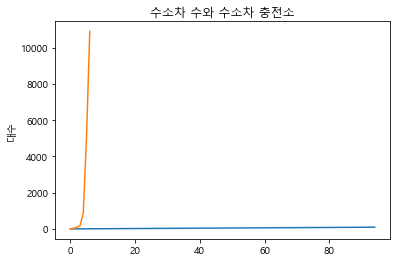

In [170]:
Hydrogen_car = pd.DataFrame()
Hydrogen_car["수소충전소"] = electric2["번호"]
Hydrogen_car["수소연료전지자동차"] = electric1["수소"]
Hydrogen_car_sum = Hydrogen_car["수소연료전지자동차"].sum()
Hydrogen_car_num = Hydrogen_car["수소충전소"].max()

print(f"수소차 충전소 당 수소차 : {Hydrogen_car_sum/Hydrogen_car_num}")
Hydrogen_car_table = pd.DataFrame({'대수': [Hydrogen_car_sum], '충전소': [Hydrogen_car_num], "수소차 충전소 당 수소차 ": [Hydrogen_car_num/Hydrogen_car_sum *100]})
print(Hydrogen_car_table)


plt.title("수소차 수와 수소차 충전소")
plt.plot(Hydrogen_car)
plt.ylabel("대수")
plt.show()
print("="*70)



    지역  2016  2017  2018  2019  2020
17  총합   514  7030  7986  8463  8700
       년도  급속충전기
0  2016.0    881
1  2017.0   1262
2  2018.0   1760
3  2019.0   2033
4  2020.0   2065
5  2021.0   1733
6     NaN   9734


<AxesSubplot:xlabel='자동차 년도'>

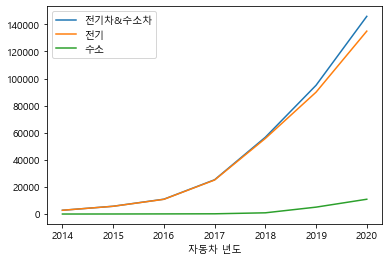

In [171]:

electric_car = pd.DataFrame()
electric_car["년도"] = electric6["년도"]
electric_car["급속충전기"] = electric6["급속충전기 보급 수량"]
ex = electric3[electric3.지역=="총합"]
print(ex)
ex=ex.drop("지역",axis=1)
ex = ex.transpose()
ex.rename(columns={'17':'총합'}, inplace=True)

print(electric_car)


fig, ax = plt.subplots()  

electric1.plot(kind='line', x='자동차 년도', y='전기차&수소차', ax=ax)
electric1.plot(kind='line', x='자동차 년도', y='전기', ax=ax)
electric1.plot(kind='line', x='자동차 년도', y='수소', ax=ax)

In [172]:
for i in range(len(electric3)):
    for j in range(1,len(electric3.iloc[1])):
        electric3.iloc[i][-1] +=  electric3.iloc[i][j]
        

print(type(electric3.iloc[3][3]))


<class 'numpy.int64'>


<ipython-input-172-72c044c4f578>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric3.iloc[i][-1] +=  electric3.iloc[i][j]


[2020, 145868, 134962, 10906]
92.52337730002468 7.47662269997532


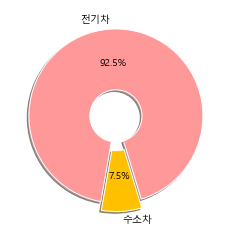

In [173]:
er = electric1.values.tolist()
print(er[-1])
su = er[-1][1]
elec  =  er[-1][2]/su *100
suso = er[-1][3]/su *100
print (elec , suso )
ratio = [elec, suso]
labels = ['전기차', '수소차']
explode = [0, 0.1]
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
plt.pie(ratio,labels= labels, autopct ='%.1f%%',startangle=260, 
counterclock=False, explode=explode, shadow =True,colors=colors, wedgeprops=wedgeprops)
plt.show()

          기준일      강원       경기      경남      경북      광주       대구      대전  \
0  2018-12-31  1377.0   6383.0  2107.0  2001.0  1447.0   6605.0  1334.0   
1  2019-12-31  2445.0  11750.0  3626.0  4051.0  2464.0  11313.0  2555.0   
2  2020-08-31  3091.0  17197.0  5003.0  5400.0  3046.0  12468.0  3338.0   
3         NaN     NaN      NaN     NaN     NaN     NaN      NaN     NaN   
4         NaN     NaN      NaN     NaN     NaN     NaN      NaN     NaN   
5         NaN     NaN      NaN     NaN     NaN     NaN      NaN     NaN   
6         NaN     NaN      NaN     NaN     NaN     NaN      NaN     NaN   
7         NaN     NaN      NaN     NaN     NaN     NaN      NaN     NaN   

       부산       서울      세종      울산      인천      전남      전북       제주      충남  \
0  1567.0   9564.0   394.0   847.0  1284.0  1974.0   997.0  15549.0  1127.0   
1  3216.0  14952.0   903.0  1447.0  2598.0  3326.0  1841.0  18178.0  2841.0   
2  4320.0  20997.0  1076.0  2142.0  4204.0  4576.0  2906.0  20699.0  4252.0   
3     Na

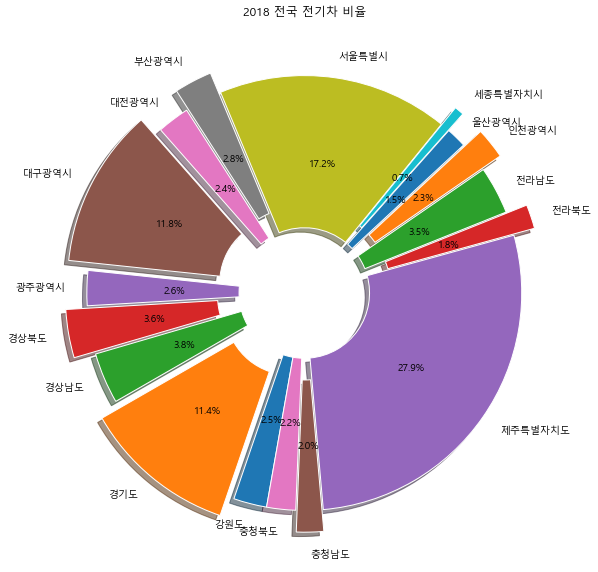

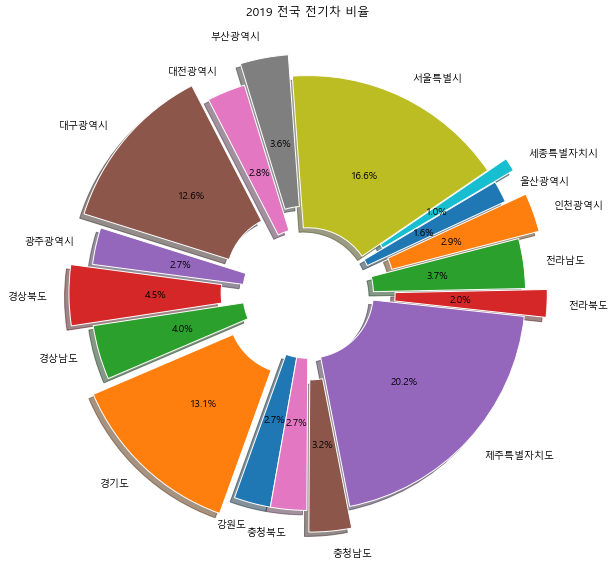

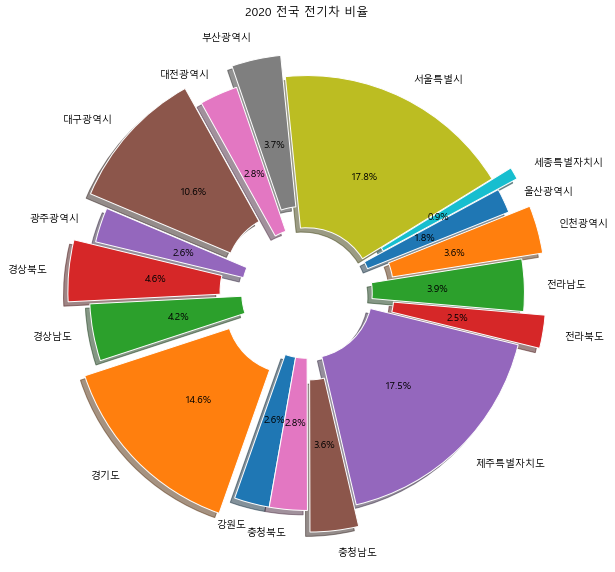

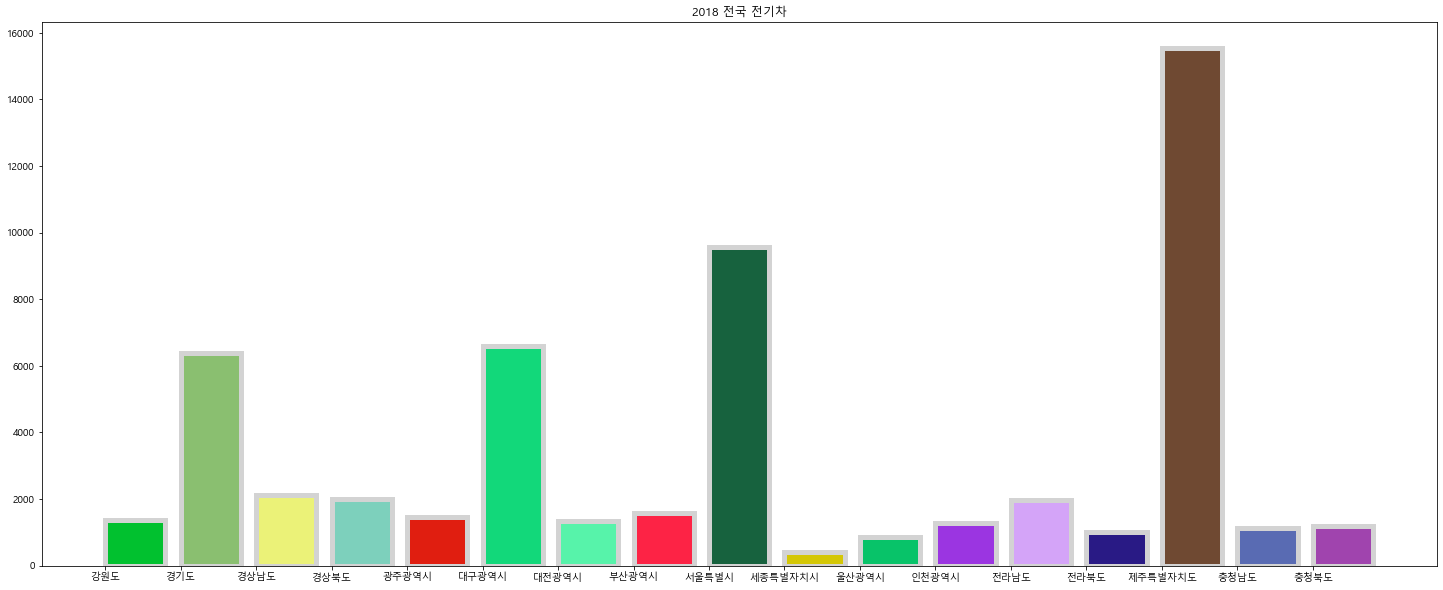

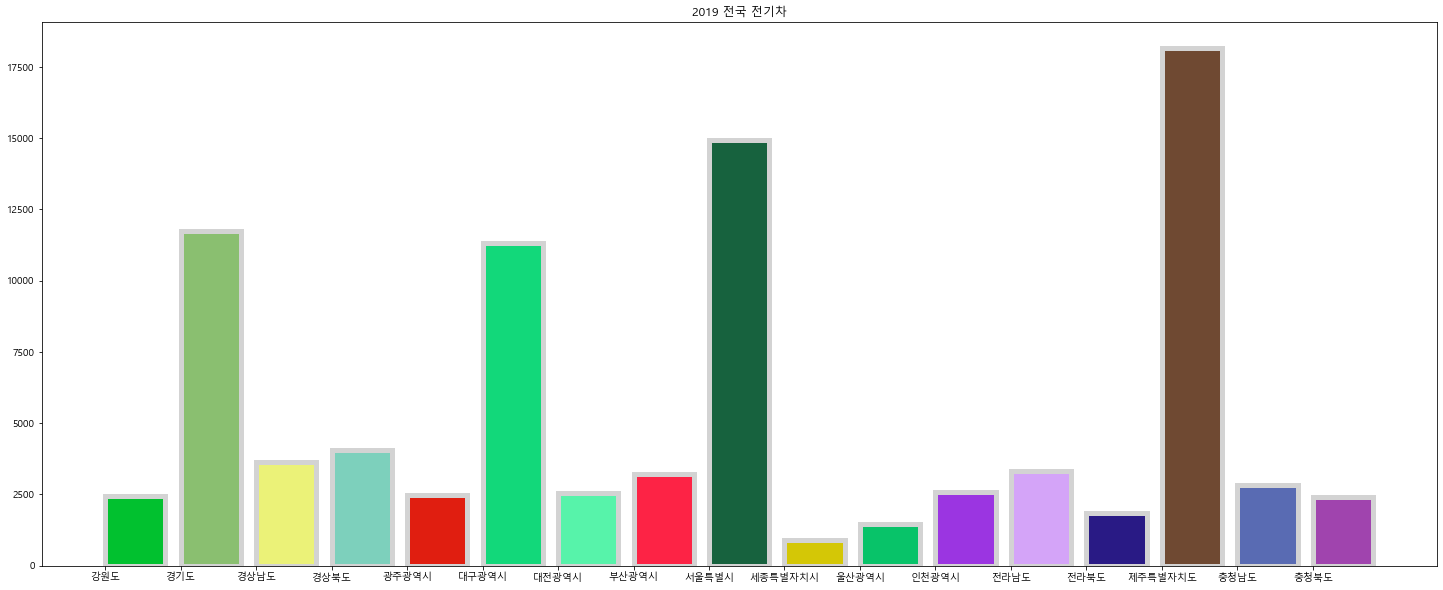

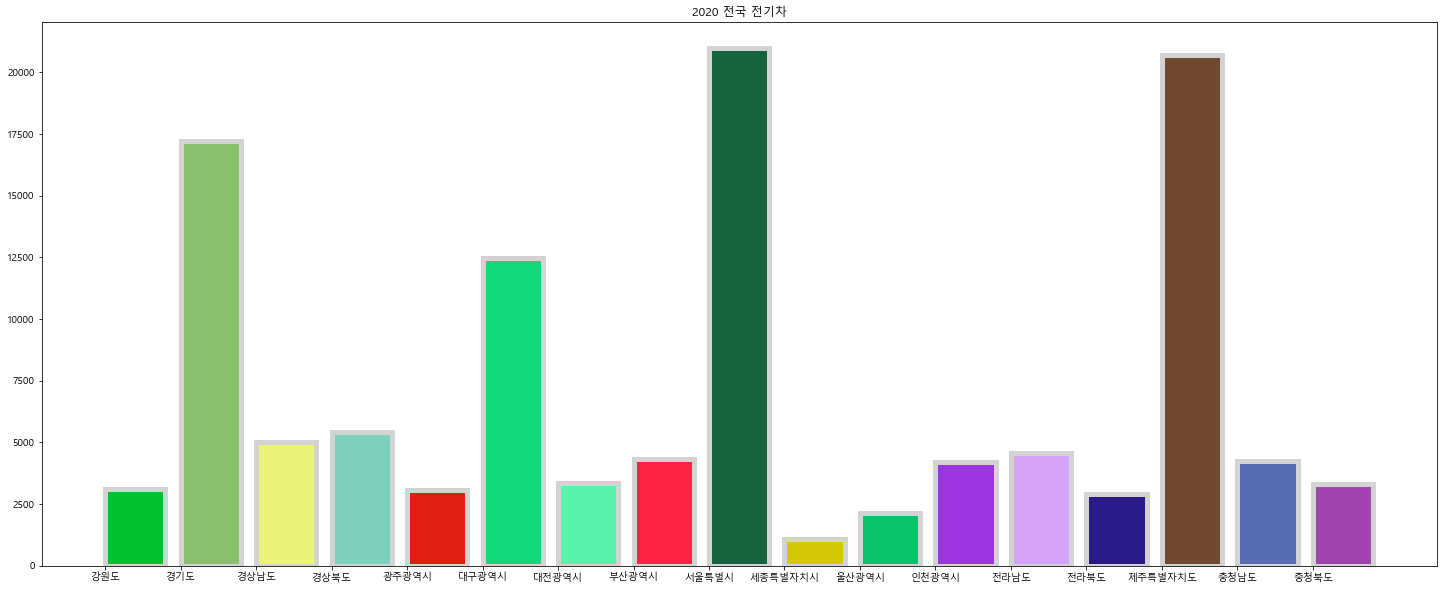

In [174]:
elec_car = electric4.values.tolist()
print(electric4)
print(elec_car)
#######################################################################################################################
# pie 
local = ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']
explode = [0, 0.1, 0,0.1,0,0.1,0,0.1,0,0.1,0,0.1,0,0.1,0,0.1,0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
colors = []
for _ in range(17):
    colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
print(colors)
elec_car_2018 = elec_car[0][1:-1]
elec_car_2019 = elec_car[1][1:-1]
elec_car_2020 = elec_car[2][1:-1]
elec_car_2018_ratio = []
elec_car_2019_ratio = []
elec_car_2020_ratio = []
for i in elec_car_2018:
    elec_car_2018_ratio.append(i/elec_car[0][-1] *100 )
for i in elec_car_2019:
    elec_car_2019_ratio.append(i/elec_car[1][-1] *100 )
for i in elec_car_2020:
    elec_car_2020_ratio.append(i/elec_car[2][-1] *100 )

plt.figure(figsize=(10,10))
plt.title("2018 전국 전기차 비율")
plt.pie(elec_car_2018_ratio,labels= local, autopct ='%.1f%%',startangle=260, 
counterclock=False, explode=explode, shadow =True, wedgeprops=wedgeprops)
plt.show()
print("="*70)
plt.figure(figsize=(10,10))
plt.title("2019 전국 전기차 비율")
plt.pie(elec_car_2019_ratio,labels= local, autopct ='%.1f%%',startangle=260, 
counterclock=False, explode=explode, shadow =True, wedgeprops=wedgeprops)
plt.show()
print("="*70)
plt.figure(figsize=(10,10))
plt.title("2020 전국 전기차 비율")
plt.pie(elec_car_2020_ratio,labels= local, autopct ='%.1f%%',startangle=260, 
counterclock=False, explode=explode, shadow =True, wedgeprops=wedgeprops)
plt.show()
print("="*70)

####################################################################################################################################
plt.figure(figsize=(25,10))
plt.title("2018 전국 전기차")
plt.bar(np.arange(len(local)), elec_car_2018, align='edge', edgecolor='lightgray', linewidth=5 ,color = colors )
plt.xticks(np.arange(len(local)), local)
plt.show()
print("="*70)

plt.figure(figsize=(25,10))
plt.title("2019 전국 전기차")
plt.bar(np.arange(len(local)), elec_car_2019 , align='edge', edgecolor='lightgray',linewidth=5,color = colors)
plt.xticks(np.arange(len(local)), local)
plt.show()
print("="*70)

plt.figure(figsize=(25,10))
plt.title("2020 전국 전기차")
plt.bar(np.arange(len(local)), elec_car_2020,align='edge', edgecolor='lightgray', linewidth=5,color = colors)
plt.xticks(np.arange(len(local)), local)
plt.show()
print("="*70)


17


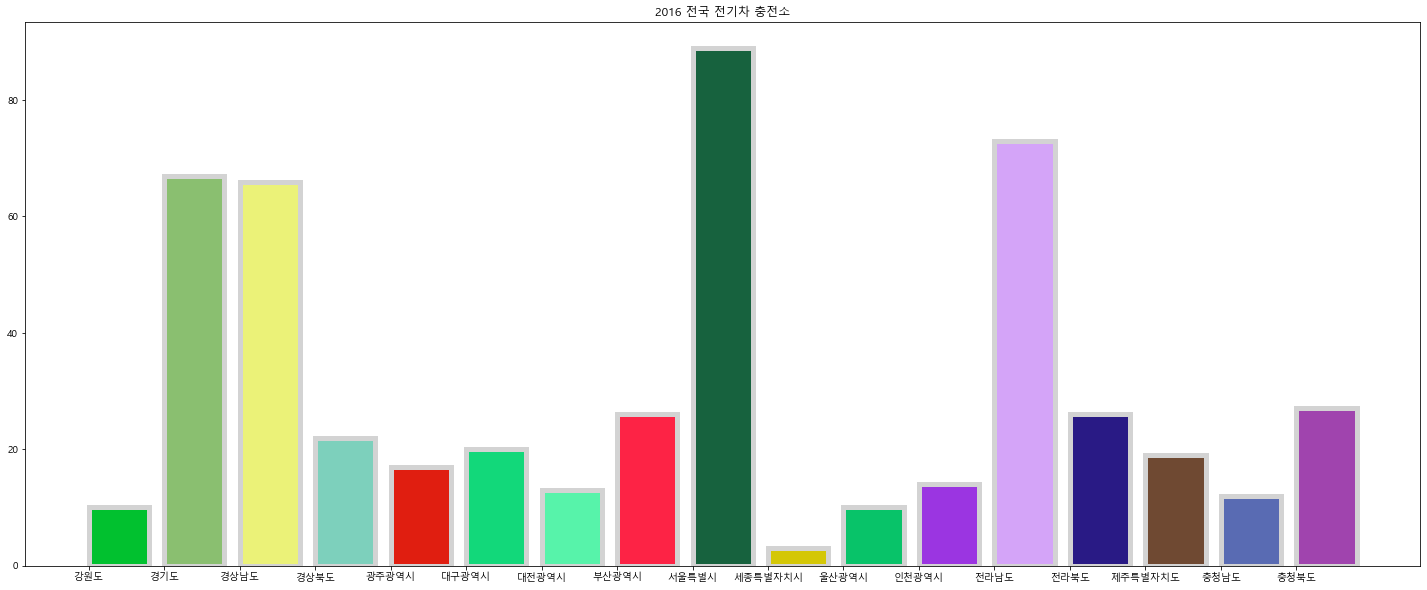

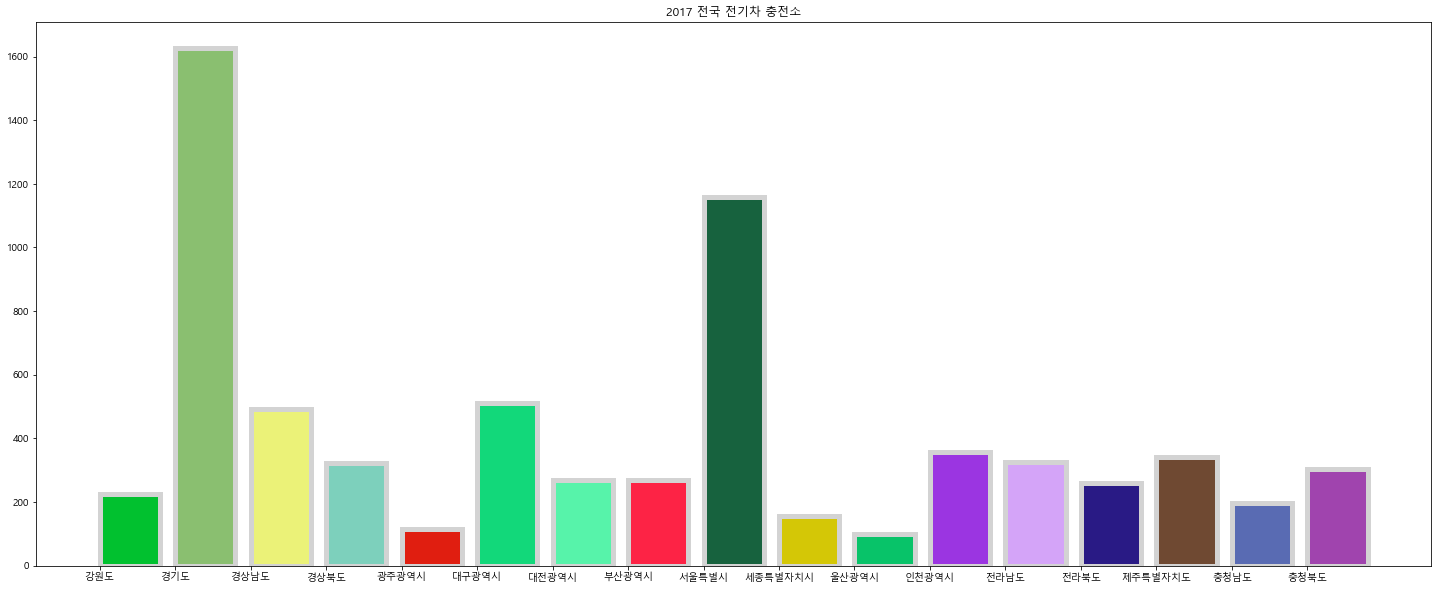

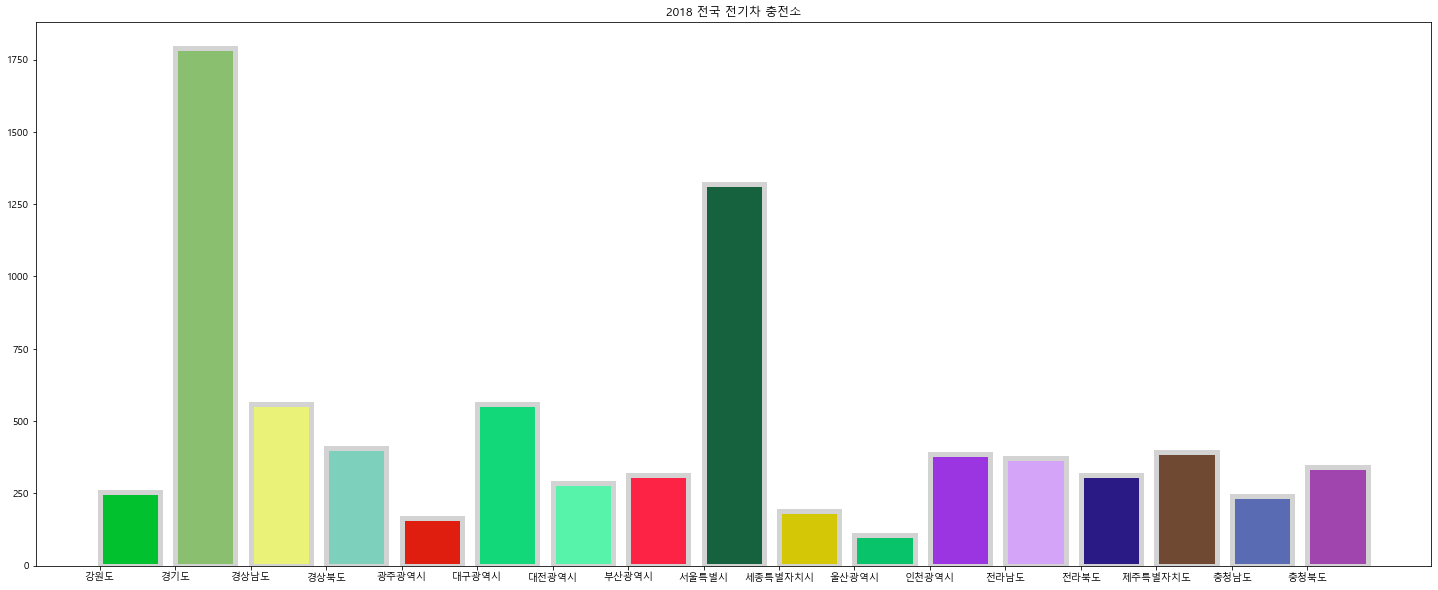

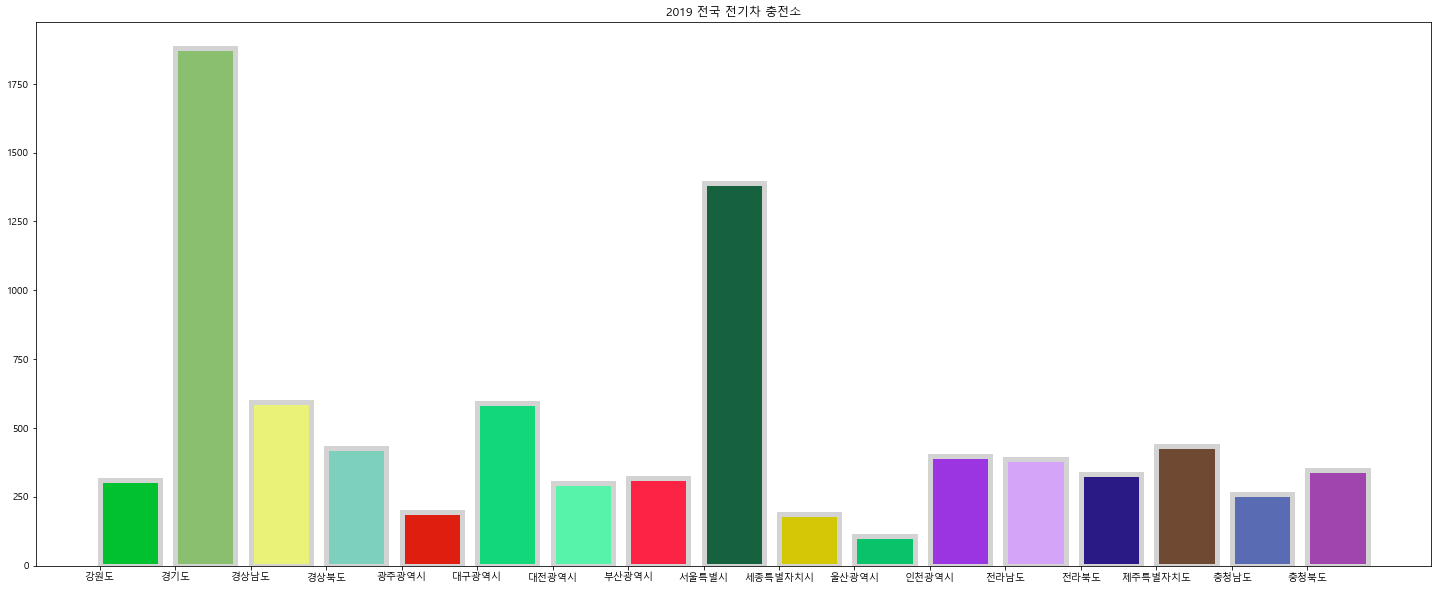

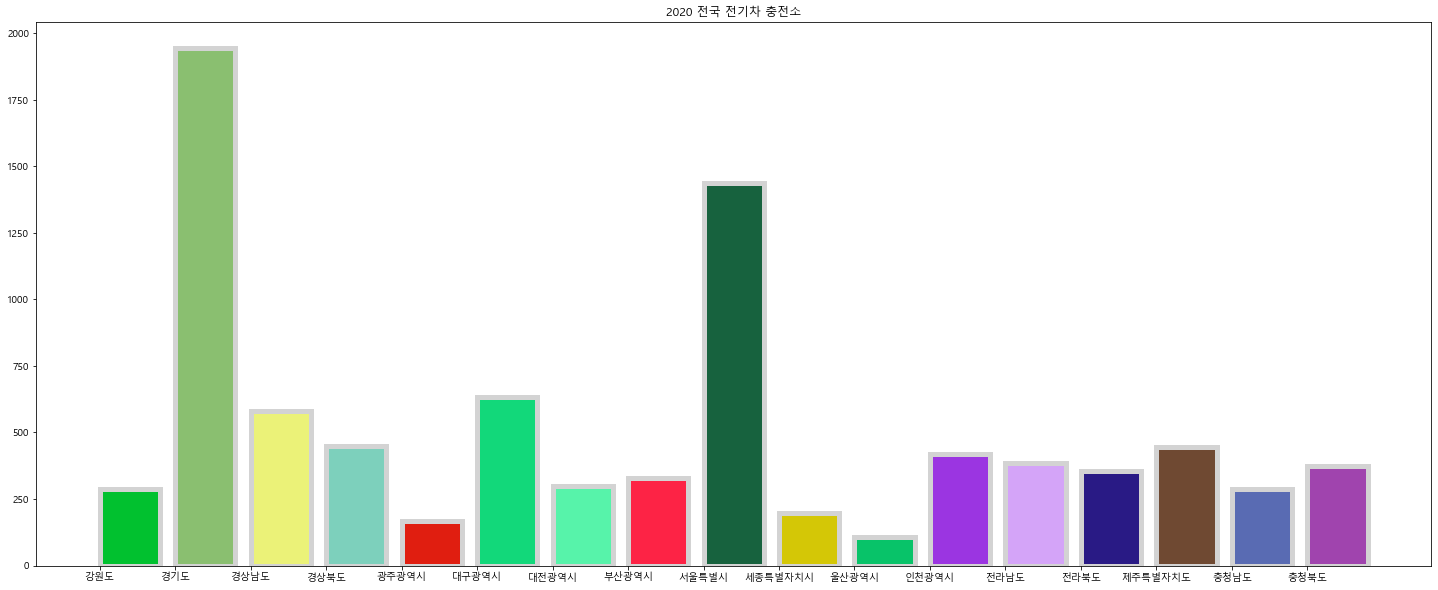

In [175]:

elec_char = electric3.values.tolist()
local = ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']


elec_char_2016=[]
elec_char_2017=[]
elec_char_2018=[]
elec_char_2019=[]
elec_char_2020=[]

for i in elec_char[:-1]:
    elec_char_2016.append(i[1])
    elec_char_2017.append(i[2])
    elec_char_2018.append(i[3])
    elec_char_2019.append(i[4])
    elec_char_2020.append(i[5])

print(len(elec_char_2016))
plt.figure(figsize=(25,10))
plt.title("2016 전국 전기차 충전소")
plt.bar(np.arange(len(local)), elec_char_2016, align='edge', edgecolor='lightgray', linewidth=5 ,color = colors )
plt.xticks(np.arange(len(local)), local)
plt.show()
print("="*70)

plt.figure(figsize=(25,10))
plt.title("2017 전국 전기차 충전소")
plt.bar(np.arange(len(local)), elec_char_2017 , align='edge', edgecolor='lightgray',linewidth=5,color = colors)
plt.xticks(np.arange(len(local)), local)
plt.show()
print("="*70)

plt.figure(figsize=(25,10))
plt.title("2018 전국 전기차 충전소")
plt.bar(np.arange(len(local)), elec_char_2018,align='edge', edgecolor='lightgray', linewidth=5,color = colors)
plt.xticks(np.arange(len(local)), local)
plt.show()
print("="*70)

plt.figure(figsize=(25,10))
plt.title("2019 전국 전기차 충전소")
plt.bar(np.arange(len(local)), elec_char_2019,align='edge', edgecolor='lightgray', linewidth=5,color = colors)
plt.xticks(np.arange(len(local)), local)
plt.show()
print("="*70)

plt.figure(figsize=(25,10))
plt.title("2020 전국 전기차 충전소")
plt.bar(np.arange(len(local)), elec_char_2020,align='edge', edgecolor='lightgray', linewidth=5,color = colors)
plt.xticks(np.arange(len(local)), local)
plt.show()
print("="*70)

In [176]:
loca = []
for i in elec_char:
    loca.append(i[0])

print(loca)

['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', '총합']
